# ECMM422 Machine Learning
## Course Assessment 1


This course assessment (CA1) represents 40% of the overall module assessment.

This is an individual exercise and your attention is drawn to the College and University guidelines on collaboration and plagiarism, which are available from the College website.


**Note:**
1. do not change the name of this notebook, i.e. the notebook file has to be named: ca1.ipynb
2. do not remove/delete any cell
3. do not add any cell (you can work on a draft notebook and only copy the function implementations here)
4. do not add you name or student code in the notebook or in the file name

**Evaluation criteria:**

Each question asks for one or more functions to be implemented. 

Each question is awarded a number of marks. 

A (hidden) unit test is going to evaluate if all desired properties of the required function(s) are met. 

If the test passes all the associated marks are awarded, if it fails 0 marks are awarded. The large number of questions and sub-questions allows a fine grading. 


**Efficiency:** There is a cap of a few minutes on the execution of each cell and unit test. Make sure your code is not terribly inefficient (for example having a cell run for hours, e.g. using nested loops rather than NumPy functions that can work directly on  arrays), otherwise the execution of the cell/unit test will be interrupted and considered a failure. 

## Notes:

We call *rank* the number of indices required to get individual elements of an array. A matrix requires two indices (row, column), and has thus rank 2, a vector requires one index and has rank 1, a scalar does not require any index and has rank 0. The components that make up rank are called *axes* (plural of axis). The dimension is how many elements are in a particular axis. A *shape* is a tuple whose length is the rank and elements are the dimension of each axis.

In the rest of the notebook, the term `data matrix` refers to a rank two numpy array where instances are encoded as rows, e.g. a data matrix with 100 rows and 4 columns is to be interpreted as a collection of 100 instances (vectors) each of dimension four.

In the rest of the notebook, the term `vector` refers to a rank one numpy array. When the term `distance` is used we mean the Euclidean distance. 

The functions you are required to write need to take in input and return as output such objects (i.e. not python lists).

---

When a required function can be implemented directly by a library function it is intended that the candidate should write her own implementation of the function.

---

Do not assume that the implementations provided in the Workshops exercises contain no mistakes. You should write and are ultimately responsible for the code that you submit in this Assessment.


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Question 1  [marks 6]

a) Make a function `data_matrix = make_data_classification(mean, std, n_centres, inner_std, n_samples, random_seed=42)` to create a data matrix according to the following rules:
1. `mean` is a n-dimensional vector (say [1,1], but the function should allow vectors of any dimension)
2. `n_centres` is the number of centres (say 3) 
3. `std` is the standard deviation (say 1)
4. the centres are sampled from a Normal distribution with mean `mean` and standard deviation `std`
5. from each centre sample `n_samples` from a Normal distribution with the centre as the mean and standard deviation `inner_std`
so if `mean=[1,1]` `n_centres=3` and `n_samples=10` then the data matrix will be a 30 rows x 2 columns numpy array.

b) Make a function `data_matrix, targets = make_data_regression(mean, std, n_centres, inner_std, n_samples, random_seed=42)` to create a data matrix  and a target vector according to the following rules:
1. the data matrix is constructed in the same way as in `make_data_classification`
2. the targets are the Euclidean distance between the sample and the centre of the generating Normal distribution

See Question 3 for a graphical example of the expected output.

In [5]:
def make_data_classification(mean, std, n_centres, inner_std, n_samples, random_seed=43):
    np.random.seed(random_seed+3)
    final_centre = []
    total_samples = n_samples
    n_samples= int(n_samples/3)
    for i in range(n_centres):
        centre = []
        for j in range(len(mean)):
            sample = std*np.random.randn(1) + mean[j]
            centre.append(sample[0])
        final_centre.append(centre)
    #print(final_centre)
    final_samples = []
    for i in range(n_centres):
        samples = []
        for j in range(len(mean)):
            sample = [[i] for  i in inner_std*np.random.randn(n_samples) + final_centre[i][j]]
            samples.append(sample)
        final_samples.append(np.hstack(samples))
        #print(final_samples)
    samples = []
    #print(total_samples-len(final_samples))
    if(total_samples-(n_samples*3)>0):
        random_center = np.random.randint(0,3)
        for j in range(len(mean)):
            sample = [[i] for  i in inner_std*np.random.randn(total_samples-(n_samples*3)) + final_centre[random_center][j]]
            samples.append(sample)
        final_samples.append(np.hstack(samples))
    elif(total_samples-(n_samples*3)<0):
        for i in range(total_samples-(n_samples*3)):
            index = np.random.randint(0,len(final_samples))
            final_samples.pop(index)

    final_samples = np.vstack(final_samples)
    return final_samples    


def make_data_regression(mean, std, n_centres, inner_std, n_samples, random_seed=43):
    np.random.seed(random_seed+10)
    final_centre = []
    total_samples = n_samples
    n_samples= int(n_samples/3)
    for i in range(n_centres):
        centre = []
        for j in range(len(mean)):
            sample = std*np.random.randn(1) + mean[j]
            centre.append(sample[0])
        final_centre.append(centre)
    #print(final_centre)
    final_samples = []
    targets = []
    for i in range(n_centres):
        samples = []
        for j in range(len(mean)):
            sample = [[i] for  i in inner_std*np.random.randn(n_samples) + final_centre[i][j]]
            samples.append(sample)
        final_samples.append(np.hstack(samples))
        #print(final_samples[i])
        targets.append([np.linalg.norm(j-final_centre[i]) for j in final_samples[i]])
        #print(targets)
    
    samples = []
    new_samples = []
    if(total_samples-(n_samples*3)>=1):
        random_center = np.random.randint(0,3)
        for j in range(len(mean)):
            sample = [[i] for  i in inner_std*np.random.randn(total_samples-(n_samples*3)) + final_centre[random_center][j]]
            samples.append(sample)
        new_samples.append(np.hstack(samples))
        final_samples.append(np.hstack(samples))
        #print(final_samples[random_center])
        targets.append([np.linalg.norm(j-final_centre[random_center]) for j in new_samples[0]])
    elif(total_samples-n_samples<0):
        print("Entered")
        for i in range(total_samples-(n_samples*3)):
            index = np.random.randint(0,len(final_samples))
            final_samples.pop(index)
            targets.pop(index)
    
    targets = np.hstack(targets).reshape(-1,1)
    final_samples = np.vstack(final_samples)
    return final_samples,targets


In [6]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [7]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2  [marks 2]

a) Make a function `data_matrix, targets = get_dataset_classification(n_samples, std, inner_std)` to create a data matrix and a target vector for a binary classification problem according to the following rules:
- the instances from the positive class are generated according to the same rules provided for `make_data_classification`; so are the instances from the negative class 
- the number of samples for the postive and negative class are balanced
- instances from the positive class have as mean the vector [10,10] and those from the negative class, vector [-10,-10]
- the number of centres is fixed to 3
- the random seed is fixed to 42
- `n_samples` indicates the total number of instances finally available in the output `data_matrix`

b) Make a function `data_matrix, targets = get_dataset_regression(n_samples, std, inner_std)` to create a data matrix according to the following rules:
- the instances are generated according to the same rules provided for `make_data_regression`
- the targets are generated according to the same rules provided for `make_data_regression`
- instances have as mean the vector [10,10]
- the number of centres is fixed to 3
- the random seed is fixed to 42
- `n_samples` indicates the total number of instances finally available in the output `data_matrix`

In [8]:
def get_dataset_classification(n_samples, std, inner_std):
    positive_class_data = make_data_classification([10,10], std, 3, inner_std, int(n_samples/2), random_seed=42)
    negative_class_data = make_data_classification([-10,-10], std, 3, inner_std, int(n_samples/2), random_seed=42)
    data_matrix = np.vstack([positive_class_data, negative_class_data])
    targets = np.vstack([np.ones((int(n_samples/2),1)),np.ones((int(n_samples/2),1))*-1])
    return data_matrix, targets

def get_dataset_regression(n_samples, std, inner_std):
    data_matrix,targets = make_data_regression([10,10], std, 3, inner_std, n_samples, random_seed=42)
    return data_matrix, targets


In [9]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3  [marks 1]

Make a function `plot(X,y)` to display the scatter plot of a data matrix of two dimensional instances using the array `y` to assign the colour to the instances.


When running 

```python
X, y = get_dataset_regression(n_samples=600, std=30, inner_std=5)
plot(X,y)
```
you should get something like

<img src='plot3.png' width=300>

and when running

```python
X, y = get_dataset_classification(n_samples=600, std=30, inner_std=5)
plot(X,y)
```
you should get something like

<img src='plot3b.png' width=300>

In [10]:
def plot(X,y):
    x = [i[0] for i in X]
    y_1 = [i[1] for i in X]
    plt.figure(figsize=(3,3))
    plt.scatter(x,y_1,c=y,edgecolor='w')
    plt.grid()
    plt.show()
    

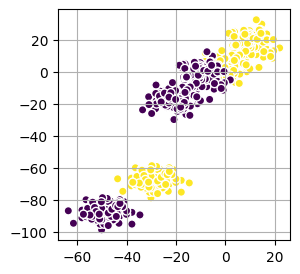

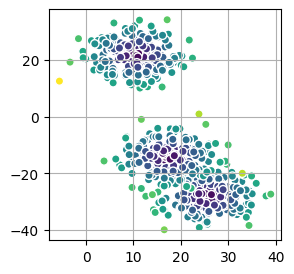

In [11]:
X, y = get_dataset_classification(n_samples=600, std=30, inner_std=5)
plot(X,y)
X, y = get_dataset_regression(n_samples=600, std=30, inner_std=5)
plot(X,y)

In [12]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 4  [marks 1]

Make a function `classification_error(targets, preds)` to compute the fraction of times that the entries in `targets` do not agree with the corresponding entries in `preds`.

**Note:** do not use library functions to compute the result directly but implement your own version.

In [13]:
def classification_error(targets, preds):
    errors = [targets[i] for i in range(len(preds)) if targets[i]!=preds[i]]
    return len(errors)/len(targets)

In [14]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 5  [marks 2]

Make a function `regression_error(targets, preds)` to compute the mean squared error between `targets` and `preds`.

$${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(T_{i}-{ {P_{i}}})^{2}.}$$

**Note:** do not use library functions to compute the result directly but implement your own version.

In [15]:
def regression_error(targets, preds):
    n = len(preds)
    error = [(targets[i]-preds[i])**2 for i in range(len(preds))]
    return sum(error)[0]/n

In [16]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 6  [marks 7]

Make a function `make_bootstrap(data_matrix, targets)` to extract a bootstrapped replicate of an input dataset. 

The function should return the following 6 elements (in this order): `bootstrap_data_matrix, bootstrap_targets, bootstrap_sample_ids, oob_data_matrix, oob_targets, oob_samples_ids`, where:
1. `bootstrap_data_matrix`: is a data matrix encoding the bootstrapped replicate of the data matrix; the number of instances in `bootstrap_data_matrix` is equal to the number of instances in `data_matrix`
2. `bootstrap_targets`: is the corresponding bootstrapped replicate of the target vector
3. `bootstrap_sample_ids`: is an array containing the instance indices of the bootstrapped replicate of the data matrix
4. `oob_data_matrix`: is a data matrix encoding the out of bag instances 
5. `oob_targets`: is the corresponding out of bag instances of the target vector
6. `oob_samples_ids`: is an array containing the instance indices of the out of bag instances 

In [17]:
def make_bootstrap(data_matrix, targets):
    bootstrap_sample_ids = []
    bootstrap_data_matrix = []
    bootstrap_target = []
    no_of_samples = len(targets)
    for i in range(no_of_samples):
        choice = np.random.randint(0, no_of_samples)
        bootstrap_sample_ids.append(choice)
        bootstrap_data_matrix.append(data_matrix[choice])
        bootstrap_target.append(targets[choice])
    uniques_sample_ids = np.unique(bootstrap_sample_ids)
    oob_data_matrix = np.array([data_matrix[i] for i in range(len(targets)) if i not in uniques_sample_ids])
    oob_sample_ids = np.array([i for i in range(len(targets)) if i not in uniques_sample_ids])
    oob_targets = np.array([targets[i] for i in range(len(targets)) if i not in uniques_sample_ids])


    return bootstrap_data_matrix,bootstrap_target,bootstrap_sample_ids,oob_data_matrix,oob_targets,oob_sample_ids

        


        

In [18]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [19]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 7  [marks 9]

Consider the following functional blueprints `estimator = train(X_train, y_train, param)` and `test(X_test, estimator)`. A function of type `train` takes in input a data matrix `X_train` a target vector `y_train` and a single value `param` (not a list of parameters). A function of type `train` outputs an object that represent an estimator. A function of type `test` takes in input a data matrix `X_test` the fit object `estimator` and outputs the predicted targets.

Using this blueprint, write the specialised train and test functions for the following classifiers and regressors (use the function signature provided in the next cell, e.g. `train_ab` for training an adaboost classifier):

Classifiers:
- a) k-nearest-neighbor: the parameter controls the number of neighbors (you may use KNeighborsClassifier from scikit) `[train_knn, test_knn]`
- b) adaboost: the parameter controls the maximal depth of the decision tree uses as weak classifier (you may use the DecisionTreeClassifier from scikit but **you should provide your own implementation of the boosting algorithm**) `[train_ab, test_ab]`
- c) random forest: the parameter controls the maximal depth of the tree (you may use the DecisionTreeClassifier from scikit but **you should provide your own implementation of the bagging algorithm**) `[train_rfc, test_rfc]`

Regressors:
- d) decision tree: the parameter controls the maximal depth of the tree (you may use the DecisionTreeRegressor from scikit) `[train_dt, test_dt]`
- e) svm linear: the parameter controls the regularization constant C (you may use SVR from scikit) `[train_svm_1, test_svm]`
- f) svm with a polynomial kernel of degree 2: the parameter controls the regularization constant C  (you may use SVR from scikit) `[train_svm_2, test_svm]`
- g) svm with a polynomial kernel of degree 3: the parameter controls the regularization constant C  (you may use SVR from scikit) `[train_svm_3, test_svm]`
- h) random forest: the parameter controls the maximal depth of the tree (you may use the DecisionTreeRegressor from scikit but **you should provide your own implementation of the bagging algorithm**) `[train_rf, test_rf]`

For the algorithms `adaboost` and `random forest`, the size of the ensemble should be fixed to 100.

In [20]:
# classifiers
from sklearn.neighbors import KNeighborsClassifier

def train_knn(X_train, y_train, param):
    model = KNeighborsClassifier(n_neighbors=param)
    model.fit(X_train, y_train.ravel())
    return model

def test_knn(X_test, est):
    predictions = est.predict(X_test)
    return predictions

from sklearn.tree import DecisionTreeClassifier

def error(targets, preds, weights=None):
    if(weights is not None):
        weighted_error = [weights[i] for i in range(len(preds)) if preds[i]!=targets[i] ]
        error  = sum(weighted_error)/sum(weights)
        return error
    else:
        unweighted_error = [1 for i in range(len(preds)) if preds[i]!=targets[i]]
        error  = sum(unweighted_error)
        return error

def update_weights(Wm, preds, targets):
    #print(preds,targets.ravel())
    errors = error(targets,preds,Wm)
    numerator = 1-errors
    classifier_error = 0.5*np.log(numerator/errors)
    updated_weights=  []
    #print("classifier error",classifier_error)
    indicator = [1 if preds[i]!=targets[i] else 0 for i in range(len(targets))]
    #print("indicator",indicator)
    for i in range(len(Wm)):
        exponent = np.exp(classifier_error*indicator[i])
        #print("exponent",exponent)
        updated_weights.append(Wm[i]*exponent)
        #print("updated weights",updated_weights)
    updated_weights = np.array([i/sum(updated_weights) for i in updated_weights])
    #print(sum(updated_weights))
    return updated_weights,classifier_error,errors

def initialise_weights(X):
    N = len(X)
    weights = [1/N for i in range(N)]
    return weights


def train_ab(X_train, y_train, param):
    models = [] 
    errors = []
    alphas = []
    weightss = []
    n_iter = 5
    weights = initialise_weights(X_train)
    y_train = y_train.ravel()
    #y_train = [-1 if y_train[i]==0 else 1 for i in range(len(y_train))]
    for m in range(n_iter):
        #print(weights)
        """fint and predict using a weak classifier: a decision tree of depth=max_depth """
        clf = DecisionTreeClassifier(max_depth=param).fit(X_train,y_train,sample_weight=weights)
        preds = clf.predict(X_train)
        
        """update instances' weights based on predictive error"""
        weights, alpha, e = update_weights(weights, preds, y_train)
        
        models.append((alpha,clf))       #Store the trained model (clf) and its weight (alpha)


        """Log info for downstream analysis"""
        errors.append(e)          
        alphas.append(alpha)      
        weightss.append(weights.copy())
    
    return models
 

def test_ab(X_test, models):
    predictions = []
    for j in range(len(X_test)):
        votes = []
        for i in models:
            alpha,clf = i
            prediction = clf.predict([X_test[j]])
            votes.append(prediction[0]*alpha)
        sum_vote = sum(votes)
        #print(sum_vote)
        predictions.append(np.sign(sum_vote))
    #predictions = [0 if predictions[i]==-1 else 1 for i in range(len(predictions))]
    return predictions

from sklearn.tree import DecisionTreeClassifier

def train_rfc(X_train, y_train, param):
    B = 3
    models = []
    for i in range(B):
        bootstrap_data_matrix,bootstrap_target,bootstrap_sample_ids,oob_data_matrix,oob_targets,oob_sample_ids = make_bootstrap(X_train, y_train)
        clf = DecisionTreeClassifier(max_depth=param).fit(bootstrap_data_matrix,bootstrap_target)
        models.append(clf)
    return models

        
def test_rfc(X_test, models):
    predictions = []
    for i in X_test:
        predictions_per_bootstrap = []
        for j in models:
            predictions_per_bootstrap.append(j.predict([i]))
        predictions_per_bootstrap = np.array(predictions_per_bootstrap)
        unique,counts = np.unique(predictions_per_bootstrap,return_counts=True)
        predictions.append(unique[np.argmax(counts)])
    return predictions
        
        


# regressors
from sklearn.tree import DecisionTreeRegressor

def train_dt(X_train, y_train, param):
    model = DecisionTreeRegressor(max_depth=param).fit(X_train, y_train.ravel())
    return model

def test_dt(X_test, est):
    predictions = est.predict(X_test)
    return predictions

from sklearn.svm import SVR

def train_svm_1(X_train, y_train, param):
    model = SVR(kernel='linear',C=param).fit(X_train, y_train.ravel())
    return model

def train_svm_2(X_train, y_train, param):
    model = SVR(kernel='poly',degree=2,C=param).fit(X_train, y_train.ravel())
    return model

def train_svm_3(X_train, y_train, param):
    model = SVR(kernel='poly',degree=3,C=param).fit(X_train, y_train.ravel())
    return model

#Note: you do not need to specialise the svm test function for each degree
def test_svm(X_test, est):
    predictions = est.predict(X_test)
    return predictions

from sklearn.tree import DecisionTreeRegressor

def train_rf(X_train, y_train, param):
    B = 5
    models = []
    for i in range(B):
        bootstrap_data_matrix,bootstrap_target,bootstrap_sample_ids,oob_data_matrix,oob_targets,oob_sample_ids = make_bootstrap(X_train, y_train)
        clf = DecisionTreeRegressor(max_depth=param).fit(bootstrap_data_matrix,bootstrap_target)
        models.append(clf)
    return models

def test_rf(X_test, models):
    predictions = []
    B = 5
    for i in X_test:
        predictions_per_bootstrap = []
        for j in models:
            predictions_per_bootstrap.append(j.predict([i]))
        predictions.append(np.round(sum(predictions_per_bootstrap)/B,2))
    return predictions
    

In [21]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [22]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [23]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [24]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [25]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [26]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
X, y = get_dataset_classification(n_samples=240, std=30, inner_std=10)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
param=3
e_knn = classification_error(y_test, test_knn(X_test, train_knn(X_train, y_train, param)))
e_rfc = classification_error(y_test, test_rfc(X_test, train_rfc(X_train, y_train, param)))
e_ab = classification_error(y_test, test_ab(X_test, train_ab(X_train, y_train, param)))
print(e_knn, e_rfc, e_ab)
```

and check that the classification error for 
- k-nearest-neighbor
- random forest classifier
- adaboost
is around

```0.16 0.19 0.16```

In [27]:
X, y = get_dataset_classification(n_samples=240, std=30, inner_std=10)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
param=3
e_knn = classification_error(y_test, test_knn(X_test, train_knn(X_train, y_train, param)))
e_rfc = classification_error(y_test, test_rfc(X_test, train_rfc(X_train, y_train, param)))
e_ab = classification_error(y_test, test_ab(X_test, train_ab(X_train, y_train, param)))
print(e_knn, e_rfc, e_ab)


0.125 0.18055555555555555 0.1388888888888889


## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):

```python
# Just run the following code, do not modify it
X, y = get_dataset_regression(n_samples=120, std=30, inner_std=10)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
param=3
e_dt = regression_error(y_test, test_dt(X_test, train_dt(X_train, y_train, param)))
e_svm2 = regression_error(y_test, test_svm(X_test, train_svm_2(X_train, y_train, param)))
e_svm3 = regression_error(y_test, test_svm(X_test, train_svm_3(X_train, y_train, param)))
print(e_dt, e_svm2, e_svm3)
```

and check that the regression error for these regressors
- decision tree
- svm with polynomial kernel of degree 2
- svm with polynomial kernel of degree 3

is approximately comparable.

In [28]:
X, y = get_dataset_regression(n_samples=120, std=30, inner_std=10)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
param=3
e_dt = regression_error(y_test, test_dt(X_test, train_dt(X_train, y_train, param)))
e_svm2 = regression_error(y_test, test_svm(X_test, train_svm_2(X_train, y_train, param)))
e_svm3 = regression_error(y_test, test_svm(X_test, train_svm_3(X_train, y_train, param)))
print(e_dt, e_svm2, e_svm3)


31.53623702970717 22.733881083649962 23.38626872034162


## Question 8  [marks 10]

Make a function `sizes, train_errors, test_errors = compute_learning_curve(train_func, test_func, param, X, y, test_size, n_steps, n_repetitions)` to compute the train and test errors as mandated in the learning curve approach.  

The regressor will be trained via `train_func` on the problem `data_matrix`, `targets` with parameter `param`. The estimate will be done averaging a number of replicates equal to `n_repetitions`, i.e. the code needs to repeat the process  `n_repetitions` times (say 10) and average the error. 

Note that a fraction of the data as indicated by `test_size` (say 0.3 for 30%) is going to be reserved for testing purposes. The remaining amount of data can be used in the training phase. The learning curve should be computed for an amount of training material that varies from a **minimum of 2 instances** up to all the instances available for training. The paramter `n_steps` defines the number of datasets of different size that are computed; e.g. if the number of available instances for training is 100 and `n_steps=5`, then one would perform experiments with datasets of size `[  2,  26,  51,  75, 100]`.

You should use the function `regression_error` to compute the error.


**Note:** do not use library functions (e.g. `learning_curve` in scikit) to compute the result directly but implement your own version.

In [29]:
def compute_learning_curve(train_func, test_func, param, X, y, test_size, n_steps, n_repetitions):
    sizes = []
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
    avg_errors_training = []
    avg_errors_test = []
    for i in range(n_steps):
        per_iter_error_test = []
        per_iter_error_train = []
        sizes.append(np.random.randint(2,len(y_train)))
        for j in range(n_repetitions):
            sample_indices = np.random.randint(0,len(y_train),sizes[i])
            trainable_samples = X_train[sample_indices]
            trainable_labels = y_train[sample_indices]
            model = train_func(trainable_samples, trainable_labels,param)
            predictions = test_func(X_test,model)
            predictions_train = test_func(trainable_samples,model)
            per_iter_error_test.append(regression_error(y_test, predictions))
            per_iter_error_train.append(regression_error(trainable_labels, predictions_train))
        
        avg_errors_test.append(np.average(per_iter_error_test))
        avg_errors_training.append(np.average(per_iter_error_train))
    return sizes,avg_errors_training,avg_errors_test


            
        


In [30]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [31]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 9  [marks 1]

Make a function `plot_learning_curve(sizes, train_errors, test_errors)` to display the train and test error as a function of the size of the training set. 

You should get something like:

<img src='plot11.png' width=400>

In [32]:
def plot_learning_curve(sizes, train_errors, test_errors):
    sizes_sorted,train_errors_sorted,test_errors_sorted = [list(x) for x in zip(*sorted(zip(sizes, train_errors,test_errors), key=lambda pair: pair[0]))]
    plt.figure(figsize=(5,3))
    plt.plot(sizes_sorted, train_errors_sorted,c='orange' , linestyle='dashed',label='train')
    plt.plot(sizes_sorted, test_errors_sorted,c='blue',label='test')
    plt.legend()
    plt.grid()
    plt.show()

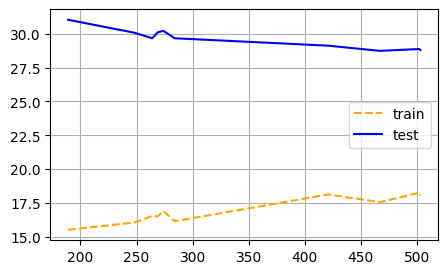

In [33]:
X, y = get_dataset_regression(n_samples=800, std=30, inner_std=10)
train_func, test_func = train_dt, test_dt
param=5
sizes, train_errors, test_errors = compute_learning_curve(train_func, test_func, param, X, y, test_size=.3, n_steps=10, n_repetitions=100)
#print(sizes)
#e = estimate_asymptotic_error(train_errors, test_errors)
#print('Asymptotic error: %.1f'%e)
plot_learning_curve(sizes, train_errors, test_errors)


In [34]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 10  [marks 3]

Make a function `estimate_asymptotic_error(sizes, train_errors, test_errors)` that returns an estimate of the asymptotic or Bayes error, i.e. the error made in the limit of an infinitely large training set.

In [35]:
def estimate_asymptotic_error(sizes, train_errors, test_errors):
    # YOUR CODE HERE
    raise NotImplementedError()

In [36]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):

```python
X, y = get_dataset_regression(n_samples=800, std=30, inner_std=10)
train_func, test_func = train_dt, test_dt
param=5
sizes, train_errors, test_errors = compute_learning_curve(train_func, test_func, param, X, y, test_size=.3, n_steps=10, n_repetitions=100)
e = estimate_asymptotic_error(train_errors, test_errors)
print('Asymptotic error: %.1f'%e)
plot_learning_curve(sizes, train_errors, test_errors)
```

you should get something like

<img src='plot12.png' width=400>


## Question 11 [marks 6]

Make a function `bias2, variance = compute_bias_variance(predictions_dict, targets)` that takes in input a dictionary of lists of predictions indexed by the instance index, and the target vector. The function should compute the squared bias component of the error and the variance components of the error for each instance.

As a toy example consider: `predictions_dict={0:[1,1,1], 1:[1,-1], 2:[-1,-1,-1,1]}` and `targets=[1,1,-1]`, that is, for instance with index 0 there are 3 predictions available `[1,1,1]`, instead for instance with index 1 there are only 2 predictions available `[1,-1]`, etc. In this case, you should get `bias2=[0.  , 1.  , 0.25]` and `variance=[0.  , 1.  , 0.75]`.

Note that if you apply Bessel's correction and divide by the number of instances - 1 rather than by the number of instance you will obtain, for small datasets, slightly different results (e.g. `variance=[[0. , 2. , 1.]` in the example). Either solutions are acceptable.

In [37]:
def compute_bias_variance(predictions_dict, targets): 
    bias = []
    variance = []
    for i,j in enumerate(predictions_dict.keys()):
        #print(i,j)
        predictions =predictions_dict[j]
        #print(np.square(np.average(predictions)-targets[i]))
        bias.append(np.square(np.average(predictions)-targets[i]))
        diff = np.array([(np.average(predictions)-k)**2 for k in predictions])
        sums = np.sum(diff)
        #print(diff,sums)
        variance.append(sums/(len(predictions)))
    #bias = [i[0] for i in bias]
    return bias,variance
        

In [38]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 12 [marks 10]

Make a function `bias2, variance = bias_variance_decomposition(train_func, test_func, param, data_matrix, targets, n_bootstraps)` to compute the bias variance decomposition of the error of a regressor on a given problem. The regressor will be trained via `train_func` on the problem `data_matrix`, `targets` with parameter `param`. The estimate will be done using a number of replicates equal to `n_bootstraps`.

In [39]:
def bias_variance_decomposition(train_func, test_func, param, data_matrix, targets, n_bootstraps):
    predictions_dict = {}
    targets_estimate  = []
    for i in range(n_bootstraps):
        bootstrap_data_matrix, bootstrap_targets, bootstrap_sample_ids, oob_data_matrix, oob_targets, oob_samples_ids = make_bootstrap(data_matrix,targets)
        bootstrap_targets = np.array(bootstrap_targets)
        model = train_func(bootstrap_data_matrix,bootstrap_targets,param)
        predictions = np.array(test_func(oob_data_matrix,model))
        unique_ids = np.unique(oob_samples_ids)
        oob_targets = np.array(oob_targets).ravel()
        #print(bootstrap_targets)
        for j in range(len(unique_ids)):
            id = unique_ids[j]
            if(id not in predictions_dict.keys()):
                indexes = np.where(oob_samples_ids==id)
                predictions_dict[id] = predictions[indexes[0]]
                targets_estimate.append(targets[id])
            else: 
                indexes = np.where(oob_samples_ids==id)
                predictions_dict[id] = list(predictions_dict[id]) + list(predictions[indexes[0]])
    
    #print(targets_estimate)
    #targets_estimate = [i for j in targets_estimate for i in j]
    #print(targets_estimate)
    bias,variance = compute_bias_variance(predictions_dict, targets_estimate)
    #print("bias is",bias)
    #print("variance is",variance)
    return bias,variance



In [40]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [41]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 13 [marks 2]

Consider the following regression problem (it does not matter that the target is only 1 and -1):

```python
from sklearn.datasets import load_iris

def make_iris_data():
    X,y = load_iris(return_X_y=True)
    X=X[:,[0,2]]
    y[y==2]=0
    y[y==0]=-1
    return X,y
```

Estimate the squared bias and variance component for each instance.  

Consider as regressor a linear svm and a polynomial svm with degree 3.

What is the class of the instances that have the highest bias error on average?

In [42]:
# Just run the following code, do not modify it
from sklearn.datasets import load_iris

def make_iris_data():
    X,y = load_iris(return_X_y=True)
    X=X[:,[0,2]]
    y[y==2]=0
    y[y==0]=-1
    return X,y

X,y = make_iris_data()

bias2, variance = bias_variance_decomposition(train_svm_1, test_svm, param=2, data_matrix=X, targets=y, n_bootstraps=100)
bias2 = np.array(bias2)
variance = np.array(variance)
print(np.mean(bias2[y==1]) , np.mean(bias2[y==-1]))
print(np.mean(variance[y==1]) , np.mean(variance[y==-1]))
#bias2, variance = bias_variance_decomposition(train_svm_3, test_svm, param=2, data_matrix=X, targets=y, n_bootstraps=100)
#bias2 = np.array(bias2)
#variance = np.array(variance)
#print(np.mean(bias2[y==1]) , np.mean(bias2[y==-1]))
#print(np.mean(variance[y==1]) , np.mean(variance[y==-1]))

1.0006205488279993 1.2793361357278996
0.02061541517867435 0.0237858054863184


In [43]:
len(bias2)

150

In [44]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 14 [marks 6]

Make a function `bs,vs = compute_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps)` to compute the average squared bias error component and the average variance component of the error for each parameter setting in the vector `params`. The regressor will be trained via `train_func` on the problem `data_matrix`, `targets` with parameter `param`. The estimate will be done using a number of replicates equal to `n_bootstraps`. To be clear, the vector `bs` contains the average square bias error for each parameter in `params` and the vector `vs` contains the average variance error for each parameter in `params`.

In [45]:
def compute_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps):
    average_bias2 =[]
    average_variance = []
    for j in params:
        bias2,variance = bias_variance_decomposition(train_func, test_func, j, data_matrix, targets, n_bootstraps)
        #bias2 = [np.sqrt(i) for i in bias2]
        average_bias2.append(sum(bias2)/len(bias2))
        average_variance.append(sum(variance)/len(variance))
        
    return average_bias2,average_variance        

In [46]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 15 [marks 1]

Make a function `plot_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps, logscale=False)`.

You should plot the individual components or the squared bias, the variance and the total error. You should allow the possibility to employ a logarithmic scale for the horizontal axis via the `logscale` flag.

You should get something like:

<img src='plot18.png' width=400>

In [47]:
def plot_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps, logscale=False):
    average_bias,average_variance = compute_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps)
    average_errors = [average_variance[i]+average_bias[i] for i in range(len(average_bias))]
    #print("bias is",average_bias)
    print("variance is",average_variance)
    if(logscale==False):
        plt.figure(figsize=(5,3))
        plt.plot(params,average_bias,label='bias2',c='b')
        plt.plot(params,average_variance,label='variance',c='orange')
        plt.plot(params,average_errors,label='total error',c='g')
        plt.grid()
        plt.legend()
        plt.show()
    else:
        plt.figure(figsize=(5,3))
        plt.semilogy(params,average_bias,label='bias2',c='b')
        plt.semilogy(params,average_variance,label='variance',c='orange')
        plt.semilogy(params,average_errors,lable='total error',c='g')
        plt.grid()
        plt.legend()
        plt.show()


In [48]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 16 [marks 2]

Make a function `find_best_param_with_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps)` that uses the bias variance decomposition analysis to determine which parameter among `params` achieves the smallest estimated predictive error.

In [49]:
def find_best_param_with_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps):
    average_bias,average_variance = compute_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps)
    average_errors = [average_variance[i]+average_bias[i] for i in range(len(average_bias))]
    average_errors = [i[0] for i in average_errors]
    #print(average_errors)
    index_min = average_errors.index(min(average_errors))
    #print(index_min)
    return params[index_min]

(400, 2) (400, 1)
Best parameter:5
variance is [0.5654585014140611, 1.1526015138943575, 1.626223145677067, 2.1412714235678525, 2.4865385133279387, 3.0924802479696947, 3.6973283076119774, 3.6773785182946157, 4.3459933010753495, 4.717881897868841, 5.010830953907078, 5.328024781988953, 5.208434808804642, 5.576218391854237, 5.743487513030649, 5.465589441064717, 5.528037945642984, 5.328278492900138, 5.413525680126419, 5.657956253694824, 5.464523181181591, 5.40338614148692, 5.617505063049306, 5.097136086985572, 5.193012567536543, 5.290581751284674, 5.32981998742523, 5.577387177766044, 5.404988038926316, 5.333187560642004]


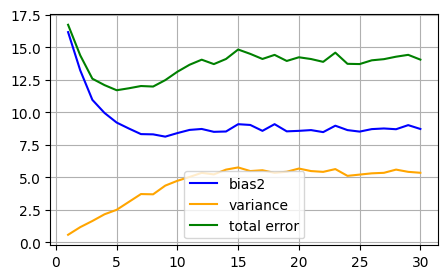

In [50]:
X, y = get_dataset_regression(n_samples=400, std=10, inner_std=7)
print(X.shape,y.shape)
params = np.linspace(1,30,30).astype(int)
train_func, test_func = train_dt, test_dt
p = find_best_param_with_bias_variance_decomposition(train_func, test_func, params, X, y, n_bootstraps=60)
print('Best parameter:%s'%p)
plot_bias_variance_decomposition(train_func, test_func, params, X, y, n_bootstraps=50, logscale=False)


In [51]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 17 [marks 6]

When you execute the following code 
```python
X, y = get_dataset_regression(n_samples=400, std=10, inner_std=7)
params = np.linspace(1,30,30).astype(int)
train_func, test_func = train_dt, test_dt
p = find_best_param_with_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps=60)
print('Best parameter:%s'%p)
plot_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps=50, logscale=False)
```

You should get something like:

<img src='plot19.png' width=400>

The next unit tests will run your functions `find_best_param_with_bias_variance_decomposition` on an undisclosed dataset using as regressors:
- decision tree
- svm degree 3

and 3 marks will be awarded for each correct optimal parameter identified.

In [52]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [53]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 18 [marks 5]

Make a function `conf_mtx = confusion_table(targets, preds)` to output the confusion matrix as a 2 x 2 Numpy array. Rows indicate the prediction and columns the target. The cell element with index [0,0] should report the true positive count. 

Running the following code:

```python
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
y[y==2]=0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

models = train_knn(X_train, y_train, param=3)
preds = test_knn(X_test, models)
conf_mtx = confusion_table(y_test, preds)
print(conf_mtx)
```
you should obtain something similar to
```
[[16.  1.]
 [ 0. 28.]]
```
Note: the exact values can differ in your run

**Note:** do not use library functions to compute the result directly but implement your own version.

In [54]:
def confusion_table(targets, preds):
    classes = list(np.unique(targets))
    positive_class = classes[0]
    negative_class = classes[1]
    TP = [1 if targets[i]==preds[i] and preds[i]==positive_class else 0 for i in range(len(targets))]
    FP = [1 if targets[i]!=preds[i] and preds[i]==positive_class else 0 for i in range(len(targets))]
    TN = [1 if targets[i]==preds[i] and preds[i]==negative_class else 0 for i in range(len(targets))]
    FN = [1 if targets[i]!=preds[i] and preds[i]==negative_class else 0 for i in range(len(targets))]
    confusion_matrix = np.array([[sum(TP),sum(FN)],[sum(FP),sum(TN)]])
    return confusion_matrix

In [55]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 19 [marks 1]

Make a function `error_from_confusion_table(confusion_table_func, targets, preds)` that takes in input the previous `confusion_table` function and returns the error, i.e. the fraction of predictions that do not agree with the targets.

In [56]:
def error_from_confusion_table(confusion_table_func, targets, preds):
    confusion_matrix = confusion_table_func(targets, preds)
    error = confusion_matrix[0,1] + confusion_matrix[1,0]
    error_fraction = error/np.sum(confusion_matrix)
    return error_fraction

In [57]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 20 [marks 12]

Make a function `predictions, out_targets = cross_validation_prediction(train_func, test_func, param, data_matrix, targets, kfold)` that estimates the predictions of a classifier trained via the function `train_func` with parameter `param` on the problem `data_matrix, targets` using a k-fold cross validation strategy with the number of folds indicated by `kfold`.

Since the order of the instances associated to the predictions can be different from the original order, the function is required to output also the corresponding target values in the array `out_targets` (i.e. the value in position 10 in `predictions` corresponds to the target value in position 10 in `out_targets` )

**Note:** do not use library functions (such as `KFold` or `StratifiedKFold`) but implement your own version of the cross validation.

In [58]:
def cross_validation_prediction(train_func, test_func, param, data_matrix, targets, kfold):
    samples_each_fold = int(len(data_matrix)/kfold)
    kfold_indices = []
    final_predictions = []
    final_targets = []
    for i in range(kfold):
        if(i==0):
            choices_available = np.arange(len(data_matrix))
        else:
            choices_available = np.setdiff1d(choices_available,choices_made)
        if(i!=kfold-1):
            #print("if",len(choices_available))
            choices_made = np.random.choice(choices_available,size=samples_each_fold,replace=False)
        else:
            #print("else",len(choices_available))
            choices_made = np.random.choice(choices_available,size=len(choices_available),replace=False)
        kfold_indices.append(choices_made)
    
    for j in range(kfold):
        test_set_indices = kfold_indices[j]
        test_set = data_matrix[test_set_indices]
        test_targets =  targets[test_set_indices]
        train_set_indices = np.setdiff1d(np.arange(len(data_matrix)),test_set_indices)
        train_set = data_matrix[train_set_indices]
        train_targets = targets[train_set_indices]
        model = train_func(train_set,train_targets,param)
        predictions =test_func(test_set,model)
        final_predictions.append(np.array([i for i in predictions]))
        final_targets.append(np.array([i for i in test_targets]))
    
    final_targets = np.array(final_targets,dtype=object)
    final_predictions=np.array(final_predictions,dtype=object)
    final_predictions = list(np.hstack(final_predictions))
    final_targets = list(np.hstack(final_targets))

    return final_predictions,final_targets
    

        
        


    

        


In [59]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [60]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 21 [marks 5]

Make a function `mean_errors = compute_errors_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)` that returns the estimated average error for each parameter in `params`. The classifier is trained via the function `train_func` with parameters taken from `params` on the problem `data_matrix, targets` using a k-fold cross validation strategy with the number of folds indicated by `kfold`.
The error estimate is repeated a number of times indicated in `n_repetitions`. The error should be computed using the function `error_from_confusion_table`. The output vector `mean_errors` has as many entries as there are paramters in `params`.

**Note:** do not use library functions (such as `cross_val_score`) but implement your own version of the code.

In [61]:
def compute_errors_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions):
    mean_errors = []
    for i in params:
        errors = []
        for j in range(n_repetitions):
            predictions,actual_targets = cross_validation_prediction(train_func, test_func, i, data_matrix, targets, kfold)
            errors.append(error_from_confusion_table(confusion_table, actual_targets, predictions))
        
        mean_errors.append(sum(errors)/n_repetitions)
    return mean_errors



In [62]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 22 [marks 2]

Make a function `find_best_param_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)` that uses crossvalidation to determine which parameter among `params` achieves the smallest estimated predictive error.

In [63]:
def find_best_param_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions):
    mean_errors = compute_errors_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)
    min_error_index = mean_errors.index(min(mean_errors))
    return params[min_error_index]

In [64]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
from sklearn.datasets import load_wine
X,y = load_wine(return_X_y=True)
y[y==2]=0
params = [3,5,7,9,11]
train_func, test_func = train_knn, test_knn
kfold = 5
n_repetitions = 5
best_param = find_best_param_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)
print(best_param)
```
and get a value around 3.

In [65]:
from sklearn.datasets import load_wine
X,y = load_wine(return_X_y=True)
y[y==2]=0
params = [3,5,7,9,11]
train_func, test_func = train_knn, test_knn
kfold = 5
n_repetitions = 5
best_param = find_best_param_with_crossvalidation(train_func, test_func, params, X, y, kfold, n_repetitions)
print(best_param)


3
